In [66]:
import pandas as pd


In [67]:
df = pd.read_csv(r"googleplaystore_dataanalysis.csv")

Data Quality

In [68]:
df.isnull().sum()

App                   0
Category              0
Rating             1474
Reviews               0
Size                  0
Installs              0
Type                  1
Price                 0
Content Rating        1
Genres                0
Last Updated          0
Current Ver           8
Android Ver           3
Unnamed: 13       10838
Unnamed: 14       10838
dtype: int64

In [69]:
df['Rating'].fillna(df['Rating'].mean(), inplace=True)

df.dropna(subset=['Type', 'Content Rating', 'Current Ver', 'Android Ver'], inplace=True)

/var/folders/dg/pj5fhv9d5mz6g54d0l31b3jh0000gp/T/ipykernel_71925/4261201760.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rating'].fillna(df['Rating'].mean(), inplace=True)


In [70]:
df['Price'] = df['Price'].astype(str)

df['Price'] = df['Price'].str.replace(r'[\$,]', '', regex=True)  
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')  

df['Installs'] = df['Installs'].astype(str)  
df['Installs'] = df['Installs'].str.replace(r'[+,]', '', regex=True)  
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce') 

df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')  

In [71]:
df.dtypes
df.dtypes.value_counts()

object     11
float64     3
int64       1
Name: count, dtype: int64

In [72]:
df.duplicated().sum()


483

Outliers Analysis

In [73]:
def find_extremes(df, column):
    min_value = df[column].min()
    max_value = df[column].max()
    return min_value, max_value

In [74]:
min_val, max_val = find_extremes(df, 'Rating')
print(f"Minimum: {min_val}, Maximum: {max_val}")


Minimum: 1.0, Maximum: 5.0


In [75]:
smallest_values = df['Rating'].nsmallest(5)
print("Smallest values:\n", smallest_values)

# Find the 5 largest values
largest_values = df['Rating'].nlargest(5)
print("Largest values:\n", largest_values)

Smallest values:
 625     1.0
4127    1.0
5151    1.0
5978    1.0
6319    1.0
Name: Rating, dtype: float64
Largest values:
 329    5.0
612    5.0
615    5.0
633    5.0
636    5.0
Name: Rating, dtype: float64


Distribution Analysis and Descriptive Statistics

In [76]:
def calculate_statistics(df, column):
    mean_value = df[column].mean()
    median_value = df[column].median()
    mode_value = df[column].mode().iloc[0] if not df[column].mode().empty else None

    return {
        'mean': mean_value,
        'median': median_value,
        'mode': mode_value
    }

stats = calculate_statistics(df, 'Rating')
print(stats)

{'mean': 4.1920411843445775, 'median': 4.2, 'mode': 4.193338315362443}


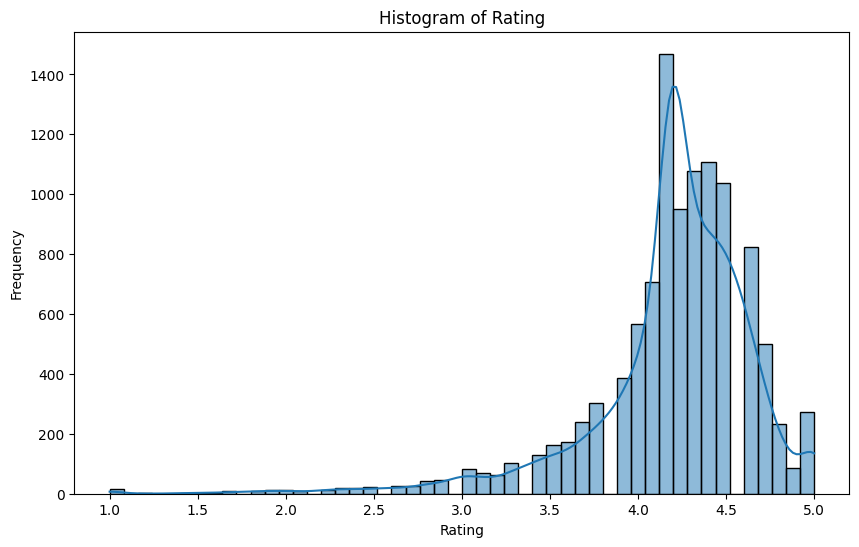

In [77]:
def plot_histogram_seaborn(df, column, bins=10):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column].dropna(), bins=bins, kde=True, edgecolor='black')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()

plot_histogram_seaborn(df, 'Rating', bins=50)

In [78]:
category_counts = df['Category'].value_counts()
print("Number of app per category:\n", category_counts)

Number of app per category:
 Category
FAMILY                 1968
GAME                   1144
TOOLS                   841
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         390
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     230
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  82
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: count, dtype: int64


Top 10 most-installed applications

In [79]:
top_installed_apps = df[['App', 'Installs']].sort_values(by='Installs', ascending=False).head(10)
print("Top 10 most-installed applications:\n", top_installed_apps)

Top 10 most-installed applications:
                                            App    Installs
391              Skype - free IM & video calls  1000000000
1872                            Subway Surfers  1000000000
4104  Messenger – Text and Video Chat for Free  1000000000
3736                               Google News  1000000000
3687                   Google Play Movies & TV  1000000000
3665                                   YouTube  1000000000
2611                                 Instagram  1000000000
3565                              Google Drive  1000000000
5395                             Google Photos  1000000000
2604                                 Instagram  1000000000


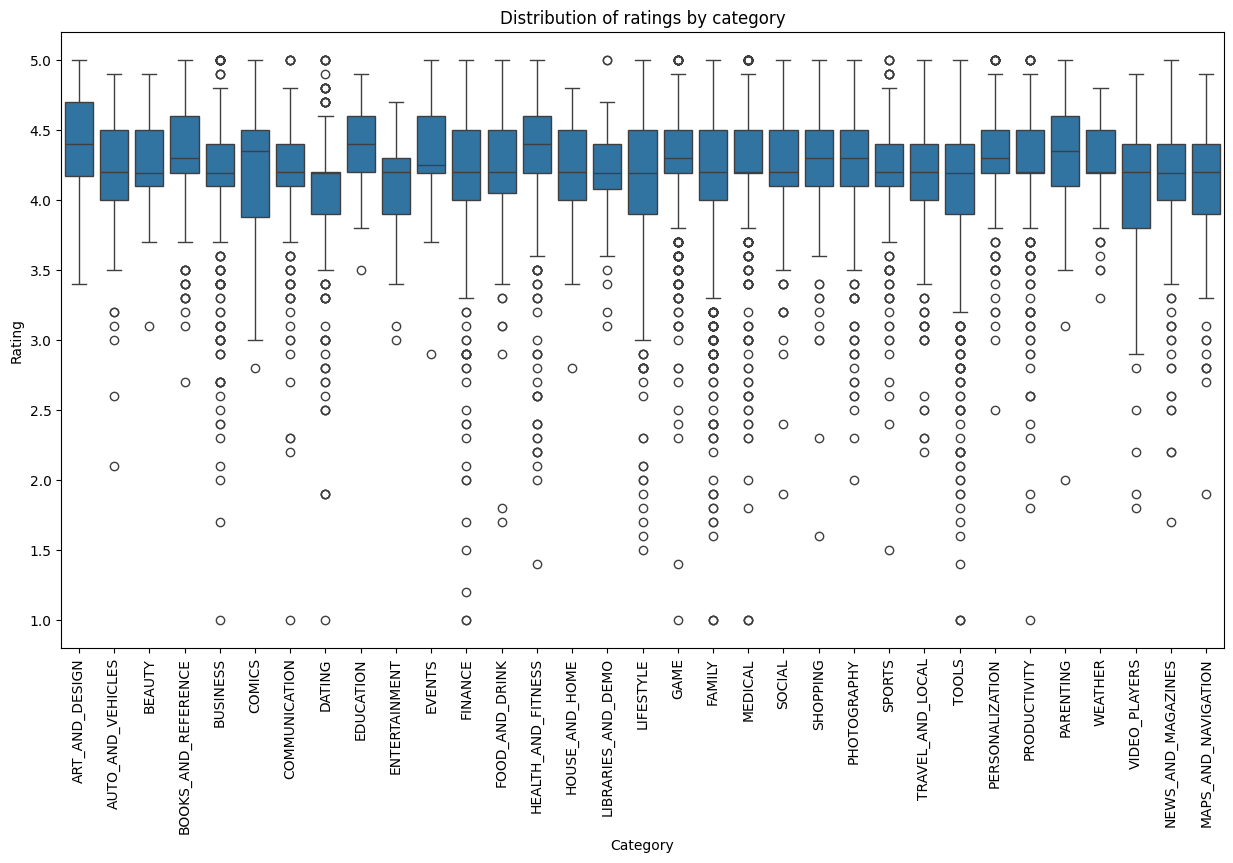

In [80]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='Category', y='Rating', data=df)
plt.xticks(rotation=90)
plt.title("Distribution of ratings by category")
plt.show()

Analysis of correlations between Price, Installs and Ratings

Correlations between Price, Installs et Ratings:
              Price  Installs    Rating
Price     1.000000 -0.011698 -0.020193
Installs -0.011698  1.000000  0.051126
Rating   -0.020193  0.051126  1.000000


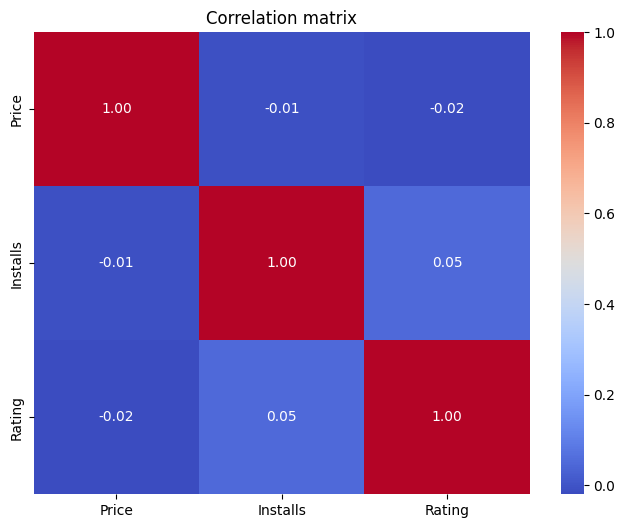

In [81]:
correlation = df[['Price', 'Installs', 'Rating']].corr()
print("Correlations between Price, Installs et Ratings:\n", correlation)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation matrix")
plt.show()

Temporal analysis of updates

In [82]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

df['Last Updated Year'] = df['Last Updated'].dt.year
df['Last Updated Month'] = df['Last Updated'].dt.month

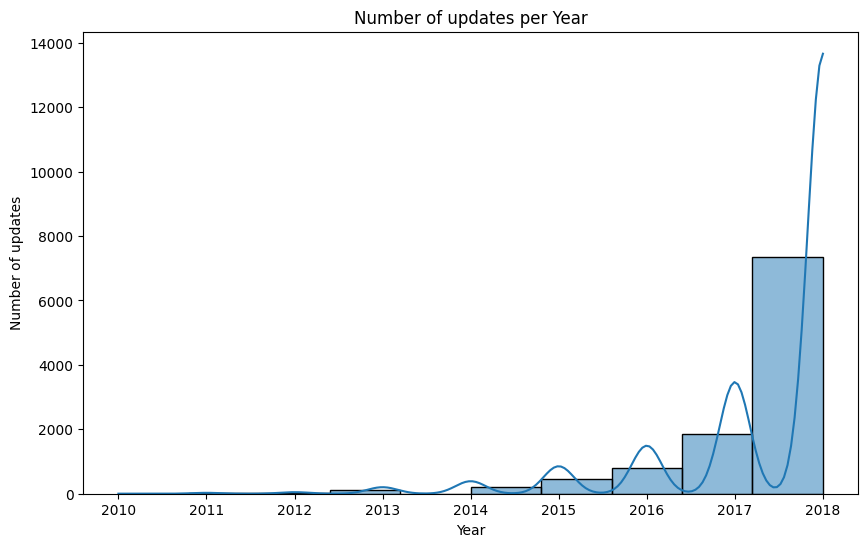

In [83]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Last Updated Year'].dropna(), bins=10, kde=True, edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Number of updates')
plt.title("Number of updates per Year")
plt.show()

Clean Dataset Export

In [84]:
df.to_csv("cleaned_googleplaystore_data.csv", index=False)
